# Laboration 4: Linjär regression
Denna laboration består av fem mindre obligatoriska uppgifter. Alla avser olika aspekter av linjär regression för ett problem med riskfaktorer för typ-2 diabetes. Linjär regression är anlogt med minsta-kvadratmetoden som ni studerat i linjär algebra. Skillnaden är att vi kommer att tolka och analysera metoden utifrån perspektivet av sannolikhetslära och statistik. Avvikkelser hos data från anpassad rät linje tolkas som normalfördelade och oberoende. Parametrar skattas med tillhörande konfidensintervall. Linjär regression är en grundpelare och naturlig *base line* inom dataanalys och maskininlärning. 

## Obligatorisk förberedelse innan laborationen startar
Studera video och tillhörande anteckningar om linjär regression. Huvudexempelet som gås igenom där finns även beskrivet i kursboken (Walpole et al). Läshänvisningar för detta finner ni i studieguiden. **I studieguiden finns även rekommenderade uppgifter som ni förväntas lösa innan laborationen för att förstå vad det hela går ut på.** Videon går lite djupare än boken på vissa detaljer som inte är nödvändiga för att lösa uppgifterna men som kan bidra till djupare förståelse kring varför formler och slutsatser ser ut som de gör.
## Genomförande
Laborationen genomförs på plats i sal i par eller enskilt. Om man arbetar i par växlar man mellan att vara navigatör och kodare i skift om 10-15 minuter.
## Examination
Laborationen examineras på plats genom att visa upp lösningar och svara på frågor kring lösningarna. 

____________________________________________________________
____________________________________________________________

## Ladda data
I en studie av riskfaktorer för typ-2 diabetes undersöktes människor i åldern 35-55 år. Diastoliskt blodtryck y i mmHg, och ålder x i år för ett urval av 20 av dessa personer analyseras enligt enkel linjär
regression. Data finns i filen Blodtryck. Vi börjar med att läsa in data, vilket enklast görs med 
```diabetes_data = np.genfromtxt('ditt_filnamn.csv', delimiter=',')```


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_data = np.genfromtxt('blodtryck.csv', delimiter=',')
ÅLDER = diabetes_data[:, 0]
BLODTRYCK = diabetes_data[:, 1]

## Visualisera
I nästa steg ska du plotta datamaterialet. Använd förslagsvis kommandot ```sns.scatterplot```. Är det rimligt att anta en linjär regressions modell?

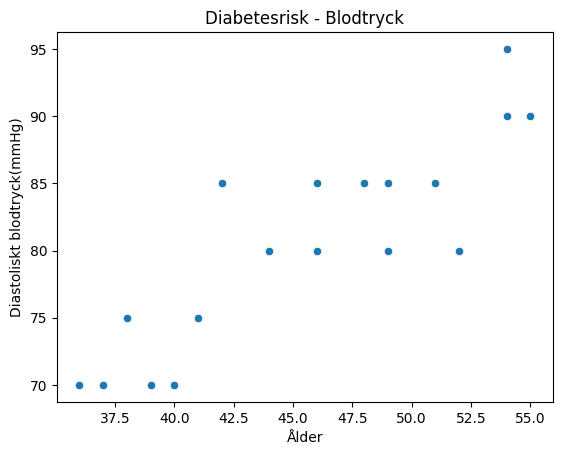

'Svar: ja det är rimligt med linjär regression.'

In [11]:

sns.scatterplot(x=ÅLDER, y=BLODTRYCK)
plt.xlabel('Ålder')
plt.ylabel('Diastoliskt blodtryck(mmHg)')
plt.title('Diabetesrisk - Blodtryck')
plt.show()

'''Svar: ja det är rimligt med linjär regression.'''

## Anpasssa din modell
Om vi antar en teoretisk modell
$y = kx + m + \varepsilon$, 
där $\varepsilon \sim N(0, \sigma^2)$, kan vi givet data, anpassa en regressionslinje $E[y] = \hat{k}x + \hat{m}$:
<ol type="a">
  <li>Beräkna skattningarna k^ och m^ med hjälp av normalekvationen.</li>
  <li>Vad är tolkningen av dessa skattningar? Är värdet m^ rimligt i sammanhanget?</li>
  <li>Plotta regressionslinjen i samma plot som användes i 1).</li>
</ol>

1.0483870967741977 33.072580645161636


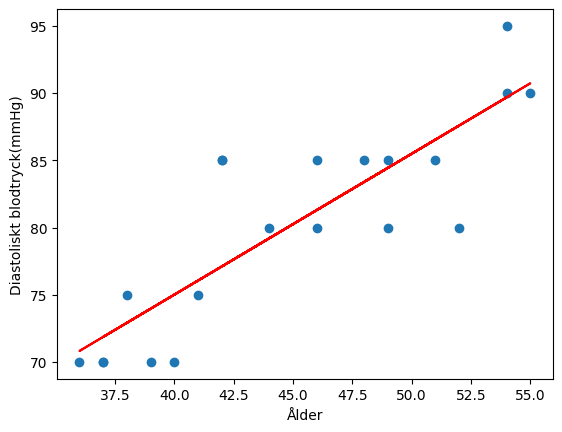

In [30]:

#a)

x = ÅLDER
y = BLODTRYCK

X = np.column_stack((np.ones_like(x), x))
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
k_hat = theta[1]
m_hat = theta[0]
print(k_hat, m_hat)

#c)
plt.scatter(x, y)
y_reg = k_hat * x + m_hat
plt.plot(x, y_reg, color='r')
plt.xlabel('Ålder')
plt.ylabel('Diastoliskt blodtryck(mmHg)')
# sns.regplot(x=ÅLDER, y=BLODTRYCK, color='r')
plt.show()

## Konfidens och korrelation
I denna uppgift ska du beräkna ett 95% konfidensintervall för $\hat{k}$? Innehåller intervallet 0? Vad tyder det på? Du ska även beräkna korrelationen mellan $x$ och $y$. Vad tyder detta på?

In [25]:
n = len(diabetes_data)
p = 2
df = n-p

y_pred = k_hat * ÅLDER + m_hat
residuals = BLODTRYCK - y_pred

MSE = np.sum(residuals**2)/df
standard_error = np.sqrt(MSE / np.sum((ÅLDER - np.mean(ÅLDER))**2))

t_value = 2.093

lower_bound = k_hat - t_value * standard_error
upper_bound = k_hat + t_value * standard_error

print("95% konfidensintervallet för k_hat: [{:.4f}, {:.4f}]".format(lower_bound, upper_bound))

correlation_coefficient = np.corrcoef(ÅLDER, BLODTRYCK)[0, 1]

print(f"Korrelations Koefficient mellan x och y: {correlation_coefficient}")

95% konfidensintervallet för k_hat: [0.7320, 1.3648]
Korrelations Koefficient mellan x och y: 0.853047633587471


## Prediktion
Charlie Sheen (52 år) vill nu mäta sitt blodtryck. Om man inte tar hänsyn till hans livsstil och använder sig bara av vår datamängd, vad blir 95% intervall för den mätningen. Vilket intervall (konfidens-/prediktions-) använder vi i detta fall?

In [28]:
## fyll på med kod

x_new = np.array([52, 0])
y_pred_C = k_hat * x_new[0] + m_hat


std_deviation = np.std(residuals)
x_mean = np.mean(ÅLDER)

std_error = std_deviation * np.sqrt(1 + 1/n + ((x_new[0] - x_mean)**2) / np.sum((ÅLDER - x_mean)**2))


t_v = 2.093

lower_bound = y_pred_C - t_v * std_error
upper_bound = y_pred_C + t_v * std_error

print(f"95% Confidence Interval for k_hat: [{lower_bound}, {upper_bound}]")


95% Confidence Interval for k_hat: [78.94051289115717, 96.23690646368269]
